In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [1.2,2.5,3.6,3,2,1]
target = [8.5,9.2,10.1,9,8,7.5]
a = np.random.rand()
b = np.random.rand()
step = 0.1

qe = [a]
ae = [a]

def absolute_err(x,a):                              # calculation of abs-error marix
    abs_er = []
    for i in range(len(x)):
        y = a*x[i] - b
        abs_er.append(abs(target[i]-y))
    return abs_er

def quadradic_err(x,a):                              # calculation of q-error marix
    q_er = []  
    for i in range(len(x)):
        y = a*x[i] - b    
        q_er.append((target[i]-y)**2)
    return q_er

def next_step(err_matrix,a,aa):                           # function to calculate new a    
    for j in range(len(err_matrix)-1):
        dif_er = err_matrix[j+1] - err_matrix[j]
        a = a - step*dif_er
    aa.append(a)
    return a    

def vec_size(a):
    s = 0
    for x in a:
        s = s + x**2
    return s**0.5    

print('a :',a,'   b:',b,'\n\n','initial error  :\n','quadratic-->',quadradic_err(x,a),'\n','absolute-->',absolute_err(x,a),'\n\n')
print('total initial q err :',vec_size(quadradic_err(x,a)),'\ntotal initial abs err :',vec_size(absolute_err(x,a)))

a : 0.6911933490880232    b: 0.7098412111328946 

 initial error  :
 quadratic--> [70.23125822916728, 66.94279768799755, 69.2481137569846, 58.312484562811264, 53.69158963945168, 56.53006567343192] 
 absolute--> [8.380409192227267, 8.181857838412835, 8.321545154416011, 7.636261163868825, 7.327454512956848, 7.518647862044872] 


total initial q err : 153.90857686493734 
total initial abs err : 19.363788615605273


In [531]:
abs_err = pd.DataFrame()
abs_err[0] = absolute_err(x,a)

def whole_error(df,a,error_type,aa):                         # calculating whole error during learning proses 
    for i in range(len(x)-1):
        a = next_step(df[i],a,aa)
        df[i+1] = error_type(x,a)
    return df

whole_abs = whole_error(abs_err,a,absolute_err,ae)

In [532]:
q_err = pd.DataFrame()
q_err[0] = quadradic_err(x,a)

whole_q = whole_error(q_err,a,quadradic_err,qe)

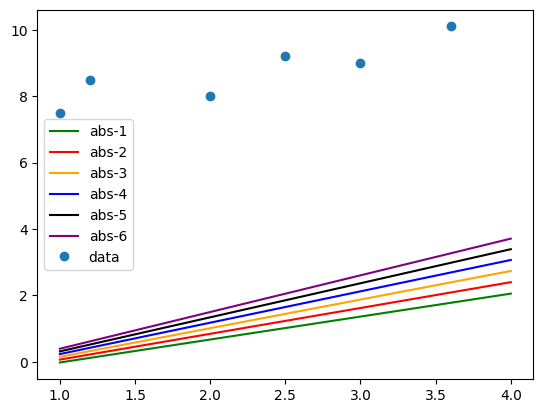

In [540]:
xx = np.linspace(1,4,200)                          # ABSOLUTE ERROR APPROACH PLOTS

y1 = ae[0]*xx - b                                  # initializing
plt.plot(xx,y1 , color = 'green',label='abs-1')

y2 = ae[1]*xx - b                                  # optimum line1 by abs-error 
plt.plot(xx,y2 , color = 'red',label='abs-2')

y3 = ae[2]*xx - b                                  # optimum line2 by abs-erro 
plt.plot(xx,y3 , color = 'orange',label='abs-3')

y4 = ae[3]*xx - b                                  # optimum line3 by abs-erro 
plt.plot(xx,y4 , color = 'blue',label='abs-4')

y5 = ae[4]*xx - b
plt.plot(xx,y5 , color = 'black',label='abs-5')

y_abs = ae[5]*xx - b
plt.plot(xx,y_abs , color = 'purple',label='abs-6')

plt.plot(x, target, 'o', label='data')

plt.legend()

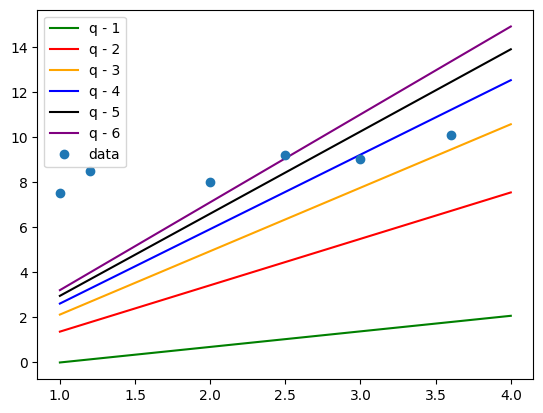

In [541]:
xx = np.linspace(1,4,200)                          # QUADRATIC ERROR APPROACH PLOTS

y1 = qe[0]*xx - b                                  # initializing
plt.plot(xx,y1 , color = 'green',label='q - 1')

y2 = qe[1]*xx - b                                  # optimum line1 by q-error 
plt.plot(xx,y2 , color = 'red',label='q - 2')

y3 = qe[2]*xx - b                                  # optimum line2 by q-erro 
plt.plot(xx,y3 , color = 'orange',label='q - 3')

y4 = qe[3]*xx - b                                  # optimum line3 by q-erro 
plt.plot(xx,y4 , color = 'blue',label='q - 4')
 
y5 = qe[4]*xx - b
plt.plot(xx,y5 , color = 'black',label='q - 5')

yq = qe[5]*xx - b
plt.plot(xx,yq , color = 'purple',label='q - 6')

plt.plot(x, target, 'o', label='data')

plt.legend()

In [542]:
total_q_err = []
total_abs_err = []
for i in range(len(whole_q)):
    total_q_err.append(vec_size(whole_q.iloc[:,i]))
    total_abs_err.append(vec_size(whole_abs.iloc[:,i]))

print('total q-error :',total_q_err,'\n\n')
print('total abs-error :',total_abs_err)

total q-error : [153.90857686493734, 68.77084366185295, 46.44462920357606, 36.868041406979984, 31.807748440516228, 29.8408632911963] 


total abs-error : [19.363788615605273, 18.89501709614613, 18.437598361216196, 17.991371924795118, 17.55618270923075, 17.131880962803315]


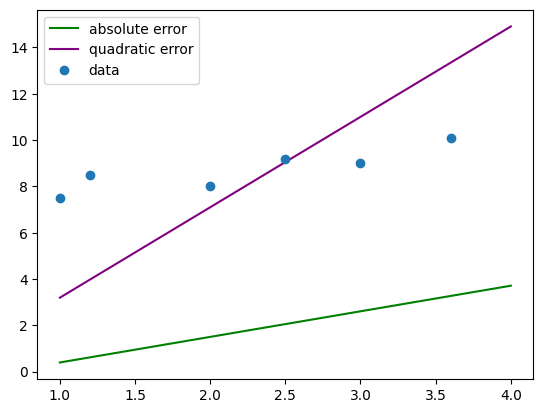

In [546]:
plt.plot(xx,y_abs , color = 'green',label='absolute error')
plt.plot(xx,yq , color = 'purple',label='quadratic error')
plt.plot(x, target, 'o', label='data')
plt.legend()